# 3 Maneras de Programar a una Red Neuronal - DOTCSV

## Código inicial

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Tensorflow

c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

Step 0 / 1000 - Loss =  0.29419065 - Acc = 0.5
Step 25 / 1000 - Loss =  0.14992465 - Acc = 0.78
Step 50 / 1000 - Loss =  0.12575468 - Acc = 0.902
Step 75 / 1000 - Loss =  0.10700185 - Acc = 0.94
Step 100 / 1000 - Loss =  0.09118864 - Acc = 0.962
Step 125 / 1000 - Loss =  0.07881368 - Acc = 0.978
Step 150 / 1000 - Loss =  0.06914956 - Acc = 0.982
Step 175 / 1000 - Loss =  0.06147447 - Acc = 0.986
Step 200 / 1000 - Loss =  0.055051785 - Acc = 0.988
Step 225 / 1000 - Loss =  0.04917066 - Acc = 0.99
Step 250 / 1000 - Loss =  0.043986496 - Acc = 0.99
Step 275 / 1000 - Loss =  0.039342865 - Acc = 0.99
Step 300 / 1000 - Loss =  0.035334036 - Acc = 0.99
Step 325 / 1000 - Loss =  0.031992473 - Acc = 0.994
Step 350 / 1000 - Loss =  0.029159637 - Acc = 0.994
Step 375 / 1000 - Loss =  0.026690338 - Acc = 0.994
Step 400 / 1000 - Loss =  0.024569867 - Acc = 0.996
Step 425 / 1000 - Loss =  0.022600768 - Acc = 0.998
Step 450 / 1000 - Loss =  0.020829687 - Acc = 0.998
Step 475 / 1000 - Loss =  0.019305

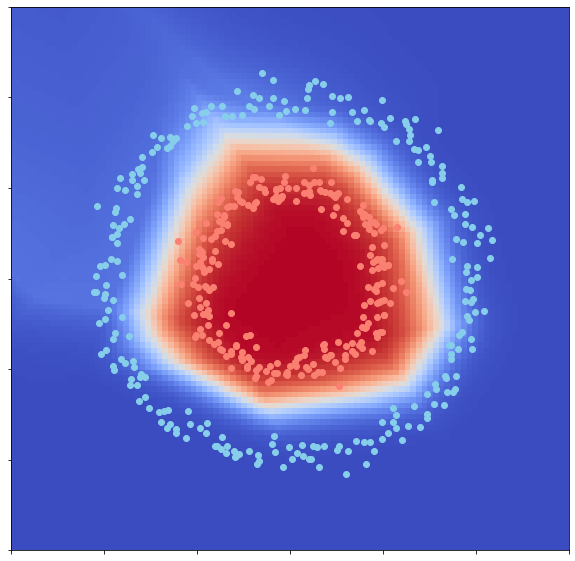

In [2]:
import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

In [5]:
Y.shape

(500,)

## Keras

In [2]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=100)

c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

Epoch 1/100
500/500 [==============================] - 0s 240us/sample - loss: 0.2672 - acc: 0.5000
Epoch 2/100
500/500 [==============================] - 0s 68us/sample - loss: 0.2640 - acc: 0.5000
Epoch 3/100
500/500 [==============================] - 0s 58us/sample - loss: 0.2614 - acc: 0.2540
Epoch 4/100
500/500 [==============================] - 0s 60us/sample - loss: 0.2594 - acc: 0.2560
Epoch 5/100
500/500 [==============================] - 0s 72us/sample - loss: 0.2579 - acc: 0.2460
Epoch 6/100
500/500 [==============================] - 0s 72us/sample - loss: 0.2565 - acc: 0.3020
Epoch 7/100
500/500 [==============================] - 0s 70us/sample - loss: 0.2550 - acc: 0.3280
Epoch 8/100
500/500 [==============================] - 0s 60us/sample - loss: 0.2536 - acc: 0.3520
Epoch 9/100
500/500 [==============================] - 0s 70us/sample - loss: 0.2525 - acc: 0.3920
Epoch 10/100
500/500 [==============================] - 0s 70us/sample - loss: 0.2511 - acc: 0.3860
Epoch 11

500/500 [==============================] - 0s 58us/sample - loss: 0.1361 - acc: 0.9960
Epoch 83/100
500/500 [==============================] - 0s 54us/sample - loss: 0.1320 - acc: 1.0000
Epoch 84/100
500/500 [==============================] - 0s 64us/sample - loss: 0.1280 - acc: 1.0000
Epoch 85/100
500/500 [==============================] - 0s 84us/sample - loss: 0.1239 - acc: 1.0000
Epoch 86/100
500/500 [==============================] - 0s 66us/sample - loss: 0.1199 - acc: 1.0000
Epoch 87/100
500/500 [==============================] - 0s 64us/sample - loss: 0.1158 - acc: 1.0000
Epoch 88/100
500/500 [==============================] - 0s 54us/sample - loss: 0.1119 - acc: 1.0000
Epoch 89/100
500/500 [==============================] - 0s 70us/sample - loss: 0.1079 - acc: 1.0000
Epoch 90/100
500/500 [==============================] - 0s 50us/sample - loss: 0.1042 - acc: 1.0000
Epoch 91/100
500/500 [==============================] - 0s 58us/sample - loss: 0.1004 - acc: 1.0000
Epoch 92/100


## Sklearn

In [4]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd', 
                                     learning_rate_init=lr, 
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.61054487
Iteration 2, loss = 0.26249697
Iteration 3, loss = 0.13688099
Iteration 4, loss = 0.12879051
Iteration 5, loss = 0.13364967
Iteration 6, loss = 0.12966175
Iteration 7, loss = 0.12604938
Iteration 8, loss = 0.12499777
Iteration 9, loss = 0.12507229
Iteration 10, loss = 0.12517852
Iteration 11, loss = 0.12508046
Iteration 12, loss = 0.12506223
Iteration 13, loss = 0.12505466
Iteration 14, loss = 0.12512421
Iteration 15, loss = 0.12514876
Iteration 16, loss = 0.12503636
Iteration 17, loss = 0.12509478
Iteration 18, loss = 0.12502991
Iteration 19, loss = 0.12510073
Iteration 20, loss = 0.12511366
Iteration 21, loss = 0.12507172
Iteration 22, loss = 0.12504123
Iteration 23, loss = 0.12503076
Iteration 24, loss = 0.12505837
Iteration 25, loss = 0.12507445
Iteration 26, loss = 0.12503976
Iteration 27, loss = 0.12503338
Iteration 28, loss = 0.12504039
Iteration 29, loss = 0.12526579
Iteration 30, loss = 0.12497768
Iteration 31, loss = 0.12515803
Iteration 32, los

c:\program files\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 8, 1), learning_rate='constant',
             learning_rate_init=0.01, max_iter=200, momentum=0.9,
             n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)